# Neupy examples
In this notebook we will go through some examples of how to use the Neupy library. Neupy is designed to calculate the neutrino emission from a nuclear reactor over the timespan of it's operations. 

A nuclear reactor creates neutrinos by first starting a fission reactor with an unstable nuclide such as $^{235}$ U or $^{238}$ Pu. The fission products are generally radioactive themselves, and decay through a variety of decay modes. Most of these decay modes are $\beta^-$ decay, with some being $\beta^+$, $\alpha$, electron capture etc. Decay modes such as $\beta^-$ emit an electron anti-neutrino $\bar{\nu}_e$. We can use the decay modes to therefore calculate the neutrino emission of a given decay path. Collecting all of these for a fission fuel, weighted by the probability of the chain to occur, we can calculate the cumulative neutrinos and later the neutrino emission rate. 

In [1]:
# Run this only if you're working in the neupy directory
import sys
import os
cwd = os.getcwd().replace('\examples', '')
sys.path.append(cwd)

Import the neupy modules

In [2]:
from neupy import Neupy
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

The Neupy class generally doesn't need any parameters, although there are optional ones.
Neupy is a child class of Neutrino emission, which adds extra information about a decay chains
neutrino profile, specifically the matter and flavour type. 

# Parameters
-------------------
- fy_kwargs, passed to databases.load_databases.load_all_fy_databases


Docs from load_all_fy_databases
-------------------

Load any txt file of the form fy{}.txt file, add them to a dictionary with key {}
and add a column of AZI, assuming all fy files are in the same format (sep = "   ", header=0 with
columns "Z", "A", "Level", "YI", "YI uncert")

@params
path: str, path where fy{}.txt files is contained.

@returns
fiss_data: Dict[str: pd.DataFrame]

In [3]:
neupy = Neupy(path=cwd+'\\databases\\')

The `Neupy` object has a number of attributes including

In [4]:
pprint(neupy.neutrino_table)
neupy.neutrino_table_key

{'2B+': (2, 1, 'e'),
 '2B-': (2, -1, 'e'),
 'B+': (1, 1, 'e'),
 'B+2p': (1, 1, 'e'),
 'B+3p': (1, 1, 'e'),
 'B+A': (1, 1, 'e'),
 'B+SF': (1, 1, 'e'),
 'B+p': (1, 1, 'e'),
 'B+pA': (1, 1, 'e'),
 'B-': (1, -1, 'e'),
 'B-2n': (1, -1, 'e'),
 'B-3n': (1, -1, 'e'),
 'B-4n': (1, -1, 'e'),
 'B-A': (1, -1, 'e'),
 'B-SF': (1, -1, 'e'),
 'B-d': (1, -1, 'e'),
 'B-n': (1, -1, 'e'),
 'B-p': (1, -1, 'e'),
 'B-t': (1, -1, 'e'),
 'EC': (1, 1, 'e'),
 'EC+B+': (1, 1, 'e'),
 'e+': (1, 1, 'e')}


('number of neutrinos', 'matter(antimatter) +(-)', 'flavour (e, mu, tau)')

In [5]:
# fission yield database, ordered by fission element (PU239, U235 etc.) and neutron energy. 
neupy.fy

{'PU239': {0.0253:          Level             Y            DY    A   Z
  AZI                                                
  0660240      0  0.000000e+00  0.000000e+00   66  24
  0670240      0  0.000000e+00  0.000000e+00   67  24
  0680240      0  0.000000e+00  0.000000e+00   68  24
  0690240      0  1.901400e-18  1.216900e-18   69  24
  0700240      0  0.000000e+00  0.000000e+00   70  24
  ...        ...           ...           ...  ...  ..
  1710711      1  0.000000e+00  0.000000e+00  171  71
  1720710      0  0.000000e+00  0.000000e+00  172  71
  1720711      1  0.000000e+00  0.000000e+00  172  71
  1710720      0  0.000000e+00  0.000000e+00  171  72
  1720720      0  0.000000e+00  0.000000e+00  172  72
  
  [1226 rows x 5 columns],
  500000.0:          Level             Y            DY    A   Z
  AZI                                                
  0660230      0  3.597100e-18  2.302100e-18   66  23
  0660240      0  8.919000e-14  5.708200e-14   66  24
  0670240      0  0.00000

In [6]:
# all methods and attributes
neupy.__dir__()

['neutrino_table',
 'neutrino_table_key',
 'fy',
 'nuclide_template',
 'missing_nuclides',
 '_fission_induced_neutrinos_cache',
 '__module__',
 '__init__',
 'weighted_cumulative_neutrinos',
 'total_weighted_neutrinos',
 'fission_induced_neutrinos',
 'all_fission_induced_neutrinos',
 'convert_thermal_to_burn_rate',
 'nuclide_cummulative_neutrinos_from_burn_rate',
 'cummulative_neutrinos_from_burn_rate',
 'slope',
 'neutrino_emission_rate',
 'neutrino_flux_for_moving_observer',
 'xe_poisoning',
 '__doc__',
 'neutrino_vec',
 'cumulative_neutrino_profile',
 'check_neutrino_profile_type',
 '__dict__',
 '__weakref__',
 '__new__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

After initialisation, we can call many methods. We can, for example, calculate the cumulative neutrinos for a decay chain. Take the I135 chain

In [7]:
from neupy import Nuclide

I135 = Nuclide(135, 53, database_path=cwd+'\\databases\\')
I135.make_decay_chain()
I135.break_decay_chain_branches()
I135.initialise_bateman_objects()
neupy.cumulative_neutrino_profile(I135.decay_chain[0])

The results are stored in I135.decay_chain. For the linear chain indexed [0], the cumulative neutrinos for each of the decay elements are stored in the `cum_neut` column. All of the columns after calculating the cumulative neutrino profile are

In [8]:
I135.decay_chain[0].columns

Index(['nuclide', 'dm', 'intensity', 'dintensity', 'path_index', 'half_life',
       'half_life_uncert', 'bateman_object', 'cum_neut', 'int_cum_neut',
       'der_cum_neut'],
      dtype='object')

The `cum_neut`, `int_cum_neut` and `der_cum_neut` represent the cumulative neutrinos, the integral, and derivative of the cumulative neutrinos respectively. The values for a decay element are functions, with time as a parameter. 

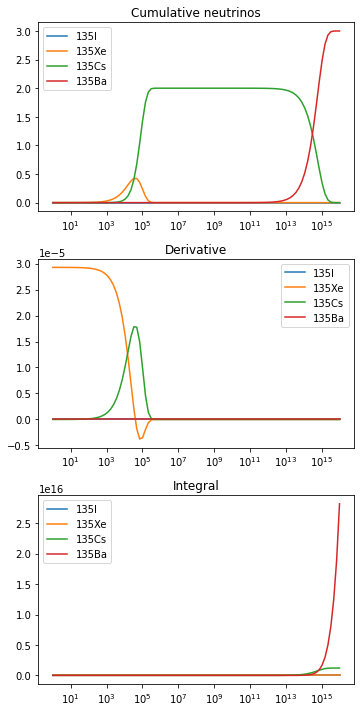

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(5, 10))

time = np.logspace(0, 16, 100)

for linear_chain in I135.decay_chain:
    cum_neutrinos = linear_chain.cum_neut.values
    der_neutrinos = linear_chain.der_cum_neut.values
    int_neutrinos = linear_chain.int_cum_neut.values
    nuclide = linear_chain.nuclide.values
    for gen, decay_element in enumerate(cum_neutrinos):
        label = nuclide[gen].nuclide_nubase_info['A El'].values[0]
        ax1.plot(time, cum_neutrinos[gen](time), label=label)
        ax2.plot(time, der_neutrinos[gen](time), label=label)
        ax3.plot(time, int_neutrinos[gen](time), label=label)

ax1.set_title('Cumulative neutrinos')
ax2.set_title('Derivative')
ax3.set_title('Integral')
ax1.set_xscale('log')
ax1.legend()
ax2.legend()
ax3.legend()
ax2.set_xscale('log')
ax3.set_xscale('log')
fig.tight_layout()
    

The iodine 135 chain has 3 $\beta^-$ decay. These emit 1 electron anti-neutrino each, so by the last decay element, the cumulative neutrinos emitted is 3. 

# Cumulative neutrinos for a fission element

When calling the `all_fission_induced_neutrinos`, neupy goes through all of the fission products for a given fuel, and calculates all of the decay chains for each, along with their concentrations, cumulative neutrino profile, integral and derivative, and it stores this information both for every nuclide seperately and as a function with time as a parameter.

The arguements for this method are 

Parameters
-------------
neutron_energy_range: Tuple[float] | float | None, if None it will include all database data without
consideration of the neutron energy, if it's a float then it will only include databases where the
neutron energy is what you gave it, otherwise it expects a tuple representing the start and end 
of the neutron range in question (start, end) inclusive of both ends.

use_elements: str | List[str], default is ['U235', 'PU239', 'U233']. This specifies which fission elements
you want to focus on.

load_saved: bool, default is False. If True, it loads the file under {file_path}{file_name} to reduce
time spent recalculating everything.

save: bool, default is True. If True, it saves the results in a file under {file_path}{file_name}.

file_name: str, default is 'neutrino_results'.

file_path: str, default is 'databases/' 

**kwargs: passed on to fission_induced_neutrinos

In [2]:
# fission_neutrinos = neupy.all_fission_induced_neutrinos(5e5, 'U235', file_path=cwd+'\\databases\\')
fission_neutrinos = neupy.all_fission_induced_neutrinos(load_saved=True, file_path=cwd+'\\databases\\')

loading fission data from c:\Users\s5027305\ChipTrapNotes\Neutrinos\neupy\databases\neutrino_results.pickle
Fission data loaded


In [11]:
fission_neutrinos

{'U235': {500000.0: {'total_neutrinos': <bound method _FissionProductTotalNeutrinos.calculate of <neupy._FissionProductTotalNeutrinos object at 0x000002409C383400>>,
   'int_total_neutrinos': <bound method _FissionProductTotalNeutrinos.calculate of <neupy._FissionProductTotalNeutrinos object at 0x00000240A849B2E0>>,
   'der_total_neutrinos': <bound method _FissionProductTotalNeutrinos.calculate of <neupy._FissionProductTotalNeutrinos object at 0x00000240A849B340>>,
   'nuclide_specific': [<nuclide.Nuclide at 0x2409c3638b0>,
    ...]}}}

You can plot the total cumulative neutrinos like so

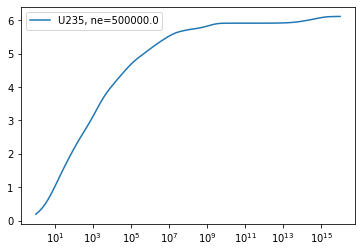

In [12]:
for fission_element, ne_range in fission_neutrinos.items():
    for ne_energy, neutrino_data in ne_range.items():
        total_neutrinos = neutrino_data['total_neutrinos']
        plt.plot(time, total_neutrinos(time), label=f"{fission_element}, ne={ne_energy}")
    
plt.xscale('log')
plt.legend()

The average neutrino emission for a single U235 fission event is 6, and this is in agreement with neupy. We can break it down into the seperate nuclides like so

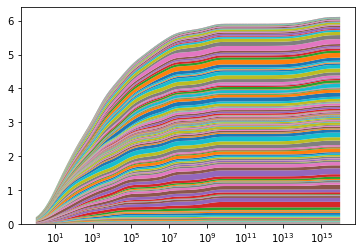

In [13]:
for fission_element, ne_range in fission_neutrinos.items():
    for ne_energy, neutrino_data in ne_range.items():
        nuclide_specific = neutrino_data['nuclide_specific']
        total_neutrinos = []
        for nuclide in nuclide_specific:
            neutrinos = nuclide.total_neutrino_profile(time)
            if isinstance(neutrinos, int):
                continue
            total_neutrinos.append(neutrinos)
        plt.stackplot(time, np.array(total_neutrinos))
    
plt.xscale('log')

# Convert thermal power to burn rate
We can now convert the thermal power output from a nuclear reactor into a fuel burn rate. 

Text(0.5, 0, 'time (s)')

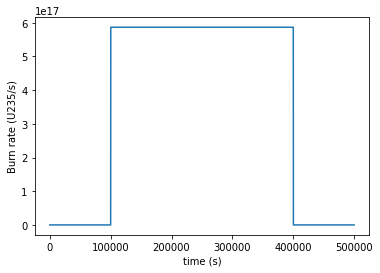

In [14]:
thermal_power = np.zeros(int(5e4)) # 50,000 seconds (about 0.5 days)
thermal_power[10000:40000] = [20e6]*30000 # 20 MW reactor
t = np.linspace(0, 5e5, int(5e4))
burn_rate = neupy.convert_thermal_to_burn_rate(thermal_power)
plt.plot(t, burn_rate['U235'])
plt.ylabel('Burn rate (U235/s)')
plt.xlabel('time (s)')

# Neutrino emission rate
From this we can calculate the neutrino profile for a thermal power output using the `cummulative_neutrinos_from_burn_rate` method. It requires the fuel burn rate, time, and has optional arguments that are passed on to the `all_fission_induced_neutrinos` method. Time should be linearly spaced, as neupy calculates the time step as being the difference between the first and second elements of the time array. 

In [15]:
cum_neutrinos = neupy.cummulative_neutrinos_from_burn_rate(burn_rate, t, load_saved=True, file_path=cwd+'\\databases\\')

loading fission data from c:\Users\s5027305\ChipTrapNotes\Neutrinos\neupy\databases\neutrino_results.pickle
Fission data loaded
Calculating cumulative neutrinos over time span
Done


Cum neut U235 500000.0: 100%|██████████| 50000/50000 [00:03<00:00, 13064.36it/s]


Text(0, 0.5, 'U235 burnt')

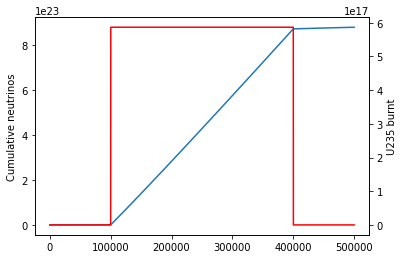

In [16]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(t, cum_neutrinos['U235'][5e5])
ax2.plot(t, burn_rate['U235'], color='r')
ax.set_ylabel('Cumulative neutrinos')
ax2.set_ylabel('U235 burnt')

# Neutrino emission rate
We can then calculate the neutrino emission rate for the burn profile. Using the `neutrino_emission_rate` method, we can use either the fuels burn rate and time, or pass in the cumulative neutrinos calculated using the `cummulative_neutrinos_from_burn_rate` method we ran earlier. If we use the cumulative neutrinos calculated previously, we should also specify what the dt span was, by default it is 1.0. Just pass in the argument dt={float}.

In [17]:
neutrino_emission_rate, (_, dt) = neupy.neutrino_emission_rate(cum_neutrinos=cum_neutrinos)

Text(0, 0.5, 'U235 burnt')

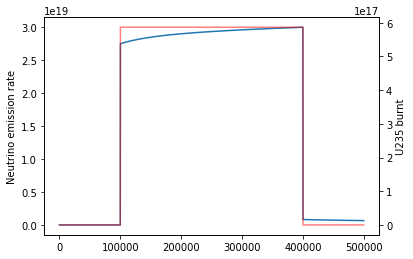

In [18]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(t, neutrino_emission_rate['U235'][5e5])
ax2.plot(t, burn_rate['U235'], color=[1, 0, 0, 0.5])
ax.set_ylabel('Neutrino emission rate')
ax2.set_ylabel('U235 burnt')

# Moving observers
An observer will experience a different neutrino flux at their position based on their radial position from a nuclear reactor, as well as their radial motion with respect to the reactor. This can be modelled using the `neutrino_flux_for_moving_observer` method

In [19]:
moving_observer_10 = neupy.neutrino_flux_for_moving_observer(neutrino_emission_rate, dt, 10, r0=0.1)
moving_observer_1 = neupy.neutrino_flux_for_moving_observer(neutrino_emission_rate, dt, 1, r0=0.1)
moving_observer_0 = neupy.neutrino_flux_for_moving_observer(neutrino_emission_rate, dt, 0, r0=0.1)

r = np.zeros(len(neutrino_emission_rate['U235'][5e5])) + 0.1
a = 1
r[10000:] = 0.5 * a * np.linspace(0, 40000, 40000)**2 + 0.1
moving_observer_non_constant = neupy.neutrino_flux_for_moving_observer(neutrino_emission_rate, r=r)

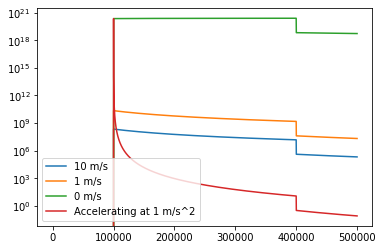

In [20]:
plt.plot(t, moving_observer_10['U235'][5e5], label='10 m/s')
plt.plot(t, moving_observer_1['U235'][5e5], label='1 m/s')
plt.plot(t, moving_observer_0['U235'][5e5], label='0 m/s')
plt.plot(t, moving_observer_non_constant['U235'][5e5], label='Accelerating at 1 m/s^2')
plt.yscale('log')
plt.legend()
plt.show()

# Effects of Xenon poisoning
Xe135 has a large thermal neutron cross section. This means that during nuclear reactor operations, Xe135 can absorb a neutron and transmutate into Xe136. This effect is modeled by including an extra disapative term in the Xe135 rate equation

$$
\frac{dN_{X_{135}}}{dt} = \lambda_I N_I(t) - \lambda_{X_{135}}N_{X_{135}}(t)-\sigma_{X_{135}}\mathbf{N}(t)\phi_0N_{X_{135}}(t)
$$

We can continue to model the next two elements in a Xe135 decay chain using the bateman equations, although we no longer have an analytic solution to them. We also have to model the Xe136 concentration using

$$
\frac{dN_{X_{136}}}{dt} = \sigma_{X_{135}}\mathbf{N}(t)\phi_0N_{X_{135}}(t)
$$

This forms 4 coupled differential equations, which can be numerically solved. This can be done using the `xe_poisoning` method in `neupy`. This method takes in a time array, and optional neutron_kwargs that are passed to `Nuclide.xe_poisoning`, which include

neutron_percent: float = 1.0,
neutron_flux: float = 1.6e9,
cross_section: float = 2.805e-18

These values can be changed is a the neutron flux is time varying (changning neutron percentage), or the nominal neutron flux is different, or if you are looking at neutron energies that see a different Xe135 cross section. 

In [1]:
neupy._fission_induced_neutrinos_cache = fission_neutrinos
xe_poisoning_neutrinos = neupy.xe_poisoning(t)

loading fission data from c:\Users\s5027305\ChipTrapNotes\Neutrinos\neupy\databases\neutrino_results.pickle
Fission data loaded


Xe poisoning for U235 500000.0: 100%|██████████| 1005/1005 [00:04<00:00, 221.18it/s]

{'U235': {500000.0: array([0.19373845, 0.26781889, 0.36383944, 0.48373999, 0.62709221,
       0.79064529, 0.96878795, 1.15462341, 1.34117358, 1.52325507,
       1.69963068, 1.87188757, 2.040545  , 2.20398466, 2.36075394,
       2.51175046, 2.66036926, 2.81129194, 2.96849367, 3.13312268,
       3.30230757, 3.46844028, 3.62195506, 3.75756748, 3.87698917,
       3.98541037, 4.0867435 , 4.18287125, 4.27493964, 4.36286716,
       4.44544066, 4.52275867, 4.59648415, 4.66762441, 4.73674014,
       4.80519084, 4.87425147, 4.94373197, 5.0123143 , 5.07898049,
       5.1433078 , 5.20485333, 5.26346477, 5.31943199, 5.37165786,
       5.41666957, 5.45176407, 5.47835708, 5.50022062, 5.51930194,
       5.53555118, 5.54964801, 5.56363348, 5.57944839, 5.59816428,
       5.62016701, 5.64488434, 5.67033465, 5.69331906, 5.71052088,
       5.72039369, 5.72438437, 5.72551865, 5.72583017, 5.72593327,
       5.72596271, 5.72597568, 5.72599116, 5.72601351, 5.72604591,
       5.72609291, 5.72616103, 5.72625977,

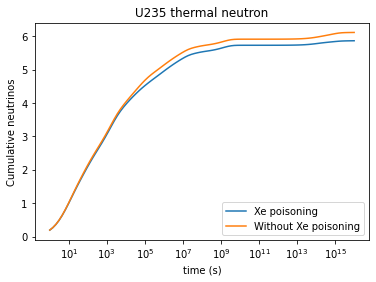

In [8]:
plt.plot(t, xe_poisoning_neutrinos['U235'][5e5], label='Xe poisoning')
plt.plot(t, fission_neutrinos['U235'][5e5]['total_neutrinos'](t), label='Without Xe poisoning')
plt.xscale('log')
plt.ylabel('Cumulative neutrinos')
plt.xlabel('time (s)')
plt.title('U235 thermal neutron')
plt.legend()
